In [1]:
#!pip install pytse_client

In [2]:
import pytse_client as tse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
#Download data from TSE Site
namad='اطلس'
data = tse.download(symbols=[namad],include_jdate= True,adjust = False) #adjust = True :قیمت تعدیل یافته سهم

In [4]:
df=data[namad]

In [5]:
#adding 26 empty row at end of dataframe
emptydf=pd.DataFrame(index=range(df.index.stop,df.index.stop+26))
df=df.append(emptydf)

In [6]:
df.tail(10)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate
1877,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1886,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
type(df),type(data)

(pandas.core.frame.DataFrame, dict)

In [8]:
df.describe()

,open,high,low,adjClose,value,volume,count,yesterday,close
count,1861.000000,1861.000000,1861.000000,1861.000000,1.861000e+03,1.861000e+03,1861.000000,1861.000000,1861.000000
mean,64982.145083,65935.012896,63938.951639,64941.360021,2.229390e+10,2.111314e+05,253.939280,64829.281032,64974.978506
std,84934.779859,86234.799541,83462.172535,84849.288205,5.469373e+10,7.393659e+05,507.649147,84783.574572,84861.943828
min,8385.000000,8500.000000,8360.000000,8395.000000,8.911000e+03,1.000000e+00,1.000000,8395.000000,8400.000000
25%,9785.000000,9848.000000,9682.000000,9767.000000,1.161751e+08,9.200000e+03,7.000000,9767.000000,9750.000000
50%,14250.000000,14285.000000,14230.000000,14250.000000,6.206580e+08,4.090800e+04,24.000000,14249.000000,14250.000000
75%,78000.000000,79790.000000,77400.000000,77634.000000,1.441935e+10,1.858990e+05,245.000000,77603.000000,77999.000000
max,285001.000000,288000.000000,279005.000000,281786.000000,6.886202e+11,2.016680e+07,4028.000000,281786.000000,281995.000000


In [9]:
#Tenkan-sen = (max-9-period high + min-9-period low) / 2
#, min_periods = 0
tenkan_max = df['high'].rolling(window = 9).max()
tenkan_min = df['low'].rolling(window = 9).min()
df['tenkan_sen'] = (tenkan_max + tenkan_min) / 2


In [10]:
#Kijun-sen = (max-26-period high + min-26-period low) / 2
kijun_max = df['high'].rolling(window = 26).max()
kijun_min = df['low'].rolling(window = 26).min()
df['kijun_sen'] = (kijun_max + kijun_min) / 2


In [11]:
#Senkou Span A = (Tenkan-sen + Kijun-sen) / 2
#(Kijun + Tenkan) / 2 Shifted ahead by 26 periods
df['senkou_a'] = ((df['kijun_sen'] + df['tenkan_sen']) / 2).shift(26)


In [12]:
#Senkou Span B = (max-52-period high + max-52-period low) / 2
#52 period High + Low / 2
senkou_b_max = df['high'].rolling(window = 52).max()
senkou_b_min = df['low'].rolling(window = 52).min()
df['senkou_b'] = ((senkou_b_max + senkou_b_min) / 2).shift(26)

In [13]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b
1857,2022-02-14,223800.0,224798.0,222407.0,224278.0,1.819276e+10,81117.0,228.0,222780.0,224760.0,1400-11-25,225000.0,224750.5,240972.75,245245.5
1858,2022-02-16,228003.0,228003.0,223000.0,223751.0,8.966587e+09,40074.0,250.0,224278.0,223147.0,1400-11-27,225000.0,224250.0,240695.50,245245.5
1859,2022-02-19,223001.0,223790.0,222501.0,223025.0,1.129421e+10,50641.0,261.0,223751.0,222825.0,1400-11-30,224002.0,224189.0,240171.00,245245.5
1860,2022-02-20,222500.0,222500.0,221110.0,221767.0,1.587209e+10,71571.0,293.0,223025.0,222149.0,1400-12-01,224002.0,223620.5,239965.50,245245.5
1861,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239745.75,245245.5
1862,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238272.50,244745.0
1863,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237908.00,244136.0
1864,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235961.50,242189.5
1865,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235323.50,242001.5
1866,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234498.50,241751.5


In [14]:
#Chikou Span = Close plotted 26 periods in the past
#Current close shifted -26
df['chikou'] = (df['close']).shift(-26)


In [15]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b,chikou
1857,2022-02-14,223800.0,224798.0,222407.0,224278.0,1.819276e+10,81117.0,228.0,222780.0,224760.0,1400-11-25,225000.0,224750.5,240972.75,245245.5,NaN
1858,2022-02-16,228003.0,228003.0,223000.0,223751.0,8.966587e+09,40074.0,250.0,224278.0,223147.0,1400-11-27,225000.0,224250.0,240695.50,245245.5,NaN
1859,2022-02-19,223001.0,223790.0,222501.0,223025.0,1.129421e+10,50641.0,261.0,223751.0,222825.0,1400-11-30,224002.0,224189.0,240171.00,245245.5,NaN
1860,2022-02-20,222500.0,222500.0,221110.0,221767.0,1.587209e+10,71571.0,293.0,223025.0,222149.0,1400-12-01,224002.0,223620.5,239965.50,245245.5,NaN
1861,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239745.75,245245.5,NaN
1862,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238272.50,244745.0,NaN
1863,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237908.00,244136.0,NaN
1864,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235961.50,242189.5,NaN
1865,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235323.50,242001.5,NaN
1866,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234498.50,241751.5,NaN


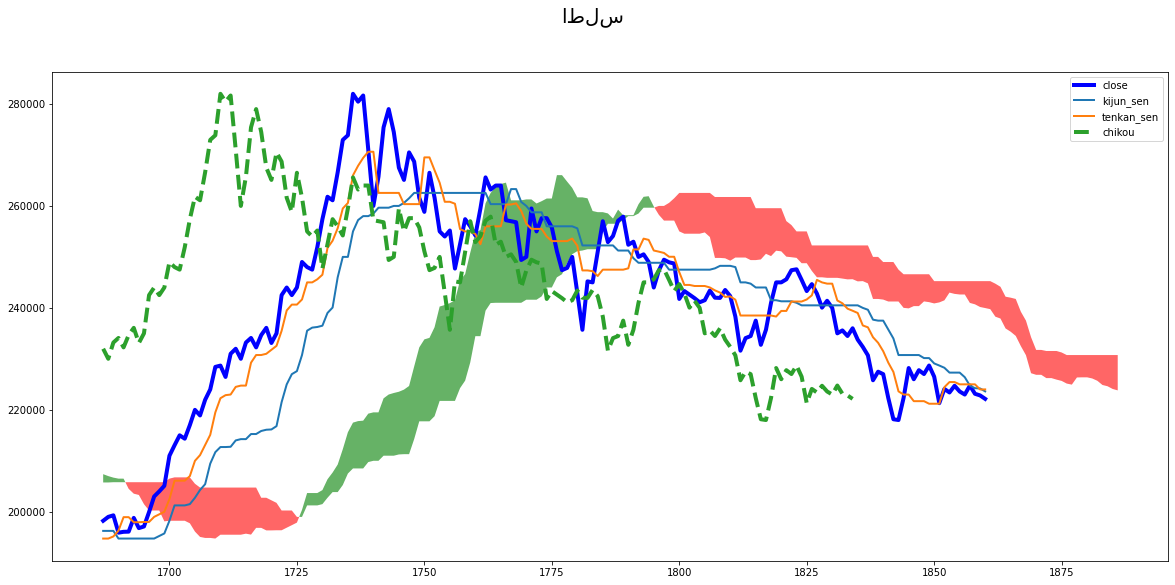

In [16]:
#Plotting Ichimoku
tmp = df[['close','kijun_sen','tenkan_sen','senkou_a','senkou_b','chikou']].tail(200)
fig,ax = plt.subplots(1,1,sharex=True,figsize = (20,9)) #share x axis and set a figure size
ax.plot(tmp['close'],label='close',linewidth=4,color='blue') # plot Close with index on x-axis with a line thickness of 4
ax.plot(tmp['kijun_sen'],label='kijun_sen',linewidth=2) # plot Close with index on x-axis with a line thickness of 4
ax.plot(tmp['tenkan_sen'],label='tenkan_sen',linewidth=2)
ax.plot(tmp['chikou'],label='chikou',linewidth=4,ls='--')
ax.fill_between(tmp.index, tmp.senkou_a, tmp.senkou_b,where=tmp['senkou_b']> tmp['senkou_a'], facecolor='red',interpolate=True,alpha=.60)
ax.fill_between(tmp.index, tmp.senkou_a, tmp.senkou_b,where=tmp['senkou_b']< tmp['senkou_a'], facecolor='green',interpolate=True,alpha=.60)
fig.suptitle(namad, fontsize=20)
ax.legend()

In [17]:
tmp

,close,kijun_sen,tenkan_sen,senkou_a,senkou_b,chikou
1687,198230.0,196251.0,194745.5,207376.00,205750.5,231980.0
1688,199000.0,196251.0,194745.5,207000.75,205750.5,230011.0
1689,199300.0,196250.5,195160.0,206700.75,205800.5,233200.0
1690,195900.0,194745.5,196295.0,206501.00,205800.5,234100.0
1691,196071.0,194745.5,198945.0,206501.00,205800.5,232250.0
...,...,...,...,...,...,...
1882,NaN,NaN,NaN,225700.25,230745.5,NaN
1883,NaN,NaN,NaN,224875.25,230745.5,NaN
1884,NaN,NaN,NaN,224625.00,230745.5,NaN
1885,NaN,NaN,NaN,224095.50,230745.5,NaN
